In [16]:
import numpy as np
#   это типо нейроны
class Linear: 
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        
    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self,dz):
        self.dW = np.dot(dz.T,self.x)
        self.db = dz.sum(axis=0)
        dx = np.dot(dz,self.W)
        return dx

    def update(self,lr=0.01):
        self.W -= lr*self.dW
        self.b -= lr*self.db 

class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z

    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)

#   это типо класс который принимает в себя объект другого класса и использует его функции
class Net:
    def __init__(self,layers):
        self.layers = layers
            
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)

def CrossEntropyLoss(y_, y):
    if y == 1:
      return -np.log(y_)
    else:
      return -np.log(1 - y_)

def BCEwithLogitsLoss(x, y):
    x = x.numpy()
    x = 1/(1 + np.exp(-x)) 
    y = y.numpy()
    arr = []
    for i in range(len(x)):
        iarr = []
        for j in range(len(x[i])):
            iarr.append(-np.log(x[i][j]) if y[i][j]==1 else -np.log(1-x[i][j]))
        arr.append(iarr)
    return np.mean(arr)

loss = CrossEntropyLoss

In [10]:
def generate_batches(X, y, batch_size):
    """
    X: np.array[n_objects, n_features] --- features
    y: np.array[n_objects] --- target
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range(0, len(X) - len(X) % batch_size, batch_size):
        indices_list = perm[batch_start : batch_start + batch_size]
        X_batch = [elem1 for elem1 in [X[j] for j in indices_list]]
        y_batch = [elem for elem in [y[i] for i in indices_list]]
        yield (X_batch, y_batch)

In [5]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split    

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

sns.set(style="darkgrid", font_scale=1.4)

In [6]:
X, y = make_moons(n_samples=10000, random_state=42, noise=0.1)

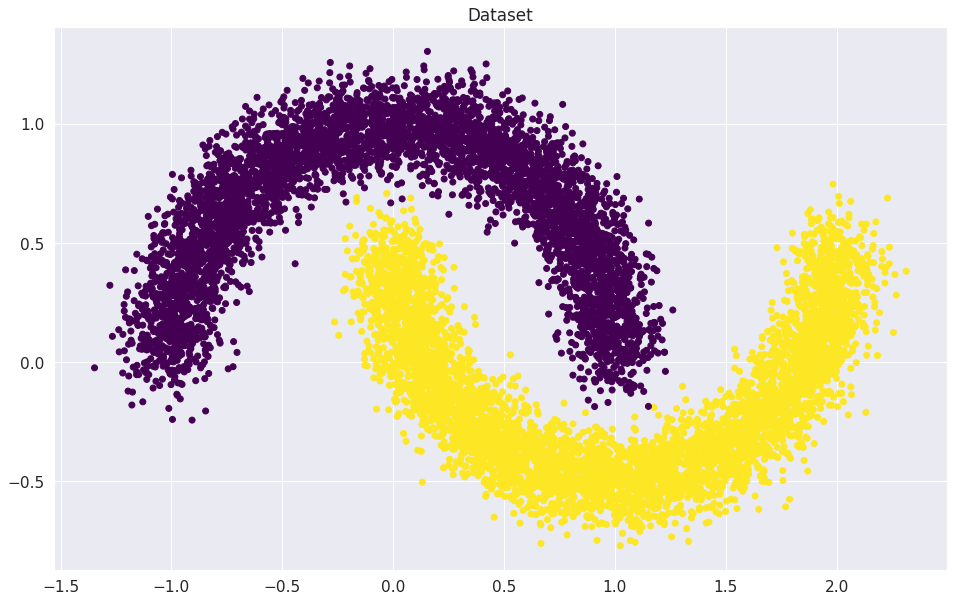

In [7]:
plt.figure(figsize=(16, 10))
plt.title("Dataset")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.show()

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [13]:
train_dataloader = generate_batches(X_train, y_train, 128)
val_dataloader = generate_batches(X_val, y_val, 128)

In [18]:
# model = Net([
#   Linear(2,2),
#   Softmax()])

model = Linear(2, 1)
loss_function = BCEwithLogitsLoss

In [19]:
tol = 1e-3
losses = []
max_epochs = 100
prev_weights = np.zeros_like(model.W)
stop_it = False
for epoch in range(max_epochs):
    for it, (X_batch, y_batch) in enumerate(train_dataloader):
        #optimizer.zero_grad()
        outp = model.forward(X_batch)
        loss = loss_function(outp, y_batch)
        model.backward()
        losses.append(loss.detach().flatten()[0])
        model.update()
        probabilities =  torch.sigmoid(outp)
        preds = (probabilities > 0.5).type(torch.long)
        batch_acc = (preds.flatten() == y_batch).type(torch.float32).sum() / y_batch.size(0)
        
        if (it + epoch * len(train_dataloader)) % 100 == 0:
            print(f"Iteration: {it + epoch * len(train_dataloader)}\nBatch accuracy: {batch_acc}")
        current_weights = linear_regression.weights.detach().clone()
        if (prev_weights - current_weights).abs().max() < tol:
            print(f"\nIteration: {it + epoch * len(train_dataloader)}.Convergence. Stopping iterations.")
            stop_it = True
            break
        prev_weights = current_weights
    if stop_it:
        break

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'